In [26]:
import      numpy               as      np
import      matplotlib.pyplot   as      plt
from        lib_Experimentum    import  *
from        Alessandria         import  *
import      configparser
inputs = configparser.ConfigParser()

#path dove stanno i dati del fit
spectra_filename    =   'NO_ARS_13_02'
spectra_path =   '../BRILLOUIN/TDP43/' + spectra_filename + '/'
analysis_dir     =   'dabuttare'
now_path         =   spectra_path+analysis_dir+'/'
save_path = '../Scrittek/figures/'
with open(now_path+'config.ini', 'r') as f:
    inputs.read_file(f)
### recupero info su dimensionalità
n_rows    =     inputs.getint('I/O', 'n_rows')
n_cols    =     inputs.getint('I/O', 'n_cols')
###
matrix, rows, cols = Initialize_Matrix(0,0,n_rows,n_cols)

Ho inizializzato una matrice 1x35, per un totale di 35 spettri


In [27]:

#1) Recupero info su posizioni + info su chi è bono e chi no e su VIPA (questo solo per matrix[0][0])

excluded = ()

with open(now_path+'markov_fit.txt', 'r') as fin:
    fit     =   eval(fin.read())
_,_,_, boni = Unpack_Fit(fit)

with open(now_path+'xy_VIPA.txt', 'r') as fin:
    VIPAs = fin.readlines()[1:]

x_VIPA = np.array(VIPAs[0][1:-2].split(), dtype=float)
y_VIPA = np.array(VIPAs[1][1:-2].split(), dtype=float)

x = np.load(now_path+'x.npy', allow_pickle = True)
y = np.load(now_path+'y.npy', allow_pickle = True)

count = 0
for ii in range(n_rows):
    for jj in range (n_cols):
        matrix[ii][jj].Recover_VIPA(x_VIPA, y_VIPA)
        matrix[ii][jj].Recover_Spectrum(x[count],y[count])    
        count+=1
        if (ii,jj) not in boni:
            excluded = excluded +((ii,jj),)
        
if count != (n_rows*n_cols): raise ValueError('Incompatibile')
print('Ok ho recuperato le informazioni sulle posizioni')

Ok ho recuperato le informazioni sulle posizioni


In [28]:
#2) Acquisico i dati prodotti dal fit markoviano


##################### MARKOVIANO

with open(now_path+'y_markov_fit.txt', 'r') as fin:
    y_fits = fin.readlines()

with open(now_path+'cost_markov.txt', 'r') as fin:
    costi = fin.readlines()

with open(now_path+'markov_fit_params.txt', 'r') as fin:
    lines   =   fin.readlines()

if (len(boni) != len(lines)):
    raise ValueError("Incompatibilità tra lunghezza boni ({}) e informazioni parametri fit ({})".format(len(boni), len(lines)))
if (len(boni) != len(costi)):
    raise ValueError("Incompatibilità tra lunghezza boni ({}) e informazioni costo fit ({})".format(len(boni), len(costi)))
if (len(boni) != len(y_fits)):
    raise ValueError("Incompatibilità tra lunghezza file parametri ({}) e y fit ({})".format(len(boni), len(y_fits)))


for (line, y_fit, cost, (ii,jj)) in zip(lines, y_fits, costi,  boni) :
#for (line, cost, (ii,jj)) in zip(lines, costi,   boni) :
    matrix[ii][jj].Recover_Markov_Fit_Params(line)
    matrix[ii][jj].Recover_y_markov_fit(np.array(y_fit[1:-2].split(), dtype = float))
    matrix[ii][jj].Recover_cost_markov(float(cost))

print('Ok ho recuperato le informazioni del Fit Markoviano')




Ok ho recuperato le informazioni del Fit Markoviano


Completata Parameter_Map per Omega
Ho trovato 0 elementi saturati


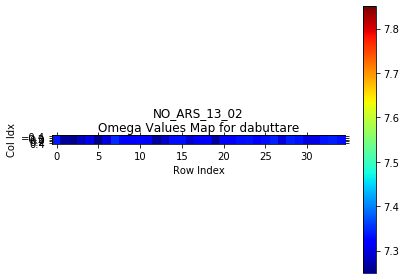

Completata Parameter_Map per Omega
Ho trovato 0 elementi saturati


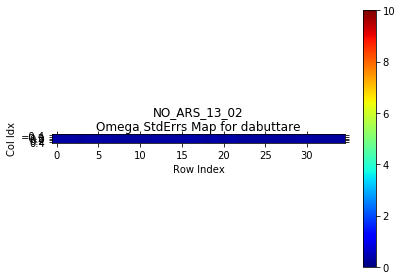

Completata Parameter_Map per Gamma
Ho trovato 0 elementi saturati


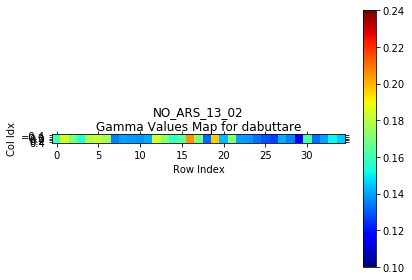

Completata Parameter_Map per Gamma
Ho trovato 0 elementi saturati


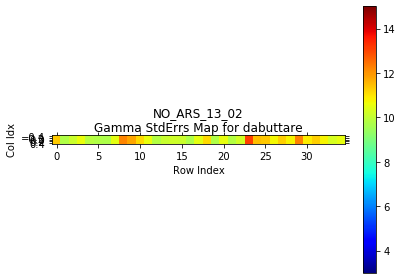

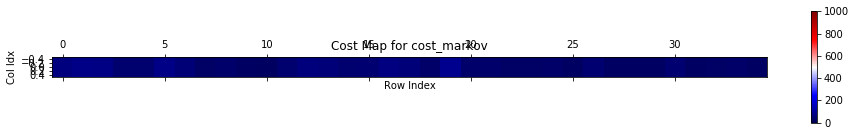

In [29]:
#MAPPE
omega_markov_map, _ = Get_Parameter_Map('markov', 'Omega', matrix, n_rows, n_cols, excluded, 'jet', 7.25, 7.85, analysis_dir, spectra_filename, fig = 'omega_markov_map', path=now_path)
Delta_omega_markov_map, _ = Get_Parameter_Map('markov', 'Omega', matrix, n_rows, n_cols, excluded, 'jet', 0,10, analysis_dir, spectra_filename ,fig = 'Delta_omega_markov_map', path=now_path, Deltas = True)
gamma_markov_map, _ = Get_Parameter_Map('markov', 'Gamma', matrix, n_rows, n_cols, excluded, 'jet', 0.1,0.24,analysis_dir, spectra_filename ,fig = 'Gamma_markov_map', path=now_path)
Delta_gamma_markov_map, _ = Get_Parameter_Map('markov', 'Gamma', matrix, n_rows, n_cols, excluded, 'jet', 3, 15, analysis_dir, spectra_filename, fig = 'Delta_Gamma_markov_map', path=now_path, Deltas = True)
markov_cost_map = Get_cost_map(matrix, 'markov', len(rows), len(cols), 'markov_cost_map', path = now_path)

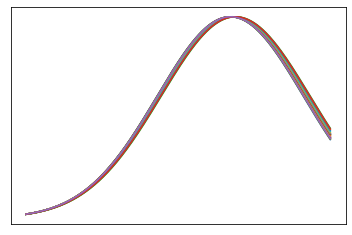

In [30]:

x = np.linspace(-35, 35, 500)
f, ax = plt.subplots()
for ii,jj in boni:
    ax.plot(x, gaussian(x, 100, *matrix[ii][jj].Markov_Fit_Params[['mu', 'sigma']].values[0]))
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig(save_path+'Gaussian flowing.pdf', format = 'pdf')

Completata Parameter_Map per mu
Ho trovato 0 elementi saturati


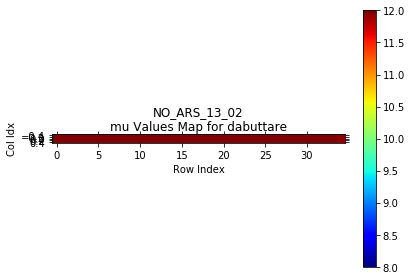

(array([[12.08189492, 13.13676315, 13.26945772, 13.13807695, 13.00799698,
         12.87998381, 12.75245922, 12.62619724, 12.67851938, 12.55298948,
         12.67978736, 12.55424491, 12.52652187, 12.4024969 , 12.52777464,
         12.5261275 , 12.65265402, 12.52738022, 12.40334675, 12.28054134,
         12.15895182, 12.11987852, 11.99987972, 12.12109063, 12.24352588,
         12.12230286, 12.24475036, 12.2511798 , 12.3749291 , 12.49992838,
         12.37616671, 12.25363041, 12.13230733, 12.01218548, 11.96107599]]),
 ())

In [31]:
Get_Parameter_Map('markov', 'mu', matrix, n_rows, n_cols, excluded, 'jet', 8, 12, analysis_dir, spectra_filename, fig = 'mu_markov_map', path=now_path)

In [32]:
matrix[0][0].Markov_Fit_Params['mu'].values[0]

12.081894918088318

In [33]:
Mus = []
for ii,jj in boni:
    Mus.append(matrix[ii][jj].Markov_Fit_Params['mu'].values[0])
Mus.sort()

In [34]:
Mus

[11.961075994999998,
 11.99987971907756,
 12.012185479481298,
 12.081894918088318,
 12.119878516268326,
 12.121090625330867,
 12.122302855616429,
 12.13230733427611,
 12.158951818810996,
 12.243525884172591,
 12.244750358874075,
 12.251179804073626,
 12.25363040761887,
 12.280541336999104,
 12.374929095023862,
 12.376166711695056,
 12.40249689821721,
 12.403346750369092,
 12.49992837881198,
 12.526127495187248,
 12.52652186719938,
 12.52738021787271,
 12.52777464453837,
 12.552989482696809,
 12.554244907187528,
 12.626197244212854,
 12.652654019915875,
 12.678519377523756,
 12.679787356259402,
 12.752459216653195,
 12.879983808404958,
 13.007996984167635,
 13.13676314587922,
 13.13807695370663,
 13.269457723097277]

In [35]:
count = []
for ii,jj in boni:
    if matrix[ii][jj].Markov_Fit_Params['mu'].values[0] < 5:
        count.append((ii,jj))
        print(str((ii,jj)))

print(len(count))

0


In [36]:
for ii,jj in boni[-5:]:
    print(matrix[ii][jj].Markov_Fit_Params[['mu', 'sigma']].values[0])

[13.00799698 17.07868647]
[13.13807695 17.09576516]
[13.26945772 17.11286092]
[13.13676315 17.12997378]
[12.08189492 16.80759236]


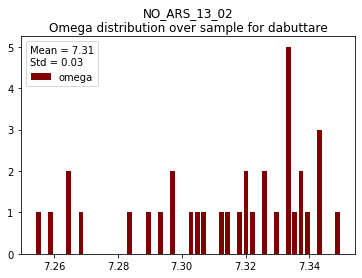

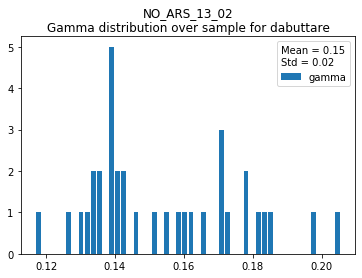

In [37]:
#HISTOGRAMs - MARKOV
markov_Omegas = np.array([matrix[ii][jj].Markov_Fit_Params['Omega'].values[0] for (ii,jj) in boni])
markov_Gammas =  np.array([matrix[ii][jj].Markov_Fit_Params['Gamma'].values[0] for (ii,jj) in boni])


plt.figure()
plt.title('{}\nOmega distribution over sample for {}'.format(spectra_filename, analysis_dir), pad = 5.)
_ = plt.hist(markov_Omegas, bins = 50, label = 'omega',histtype = 'bar', stacked = True, rwidth= 0.8,  color = 'maroon')
plt.legend(title='Mean = {:3.2f}\nStd = {:3.2f}'.format(np.mean(markov_Omegas), np.std(markov_Omegas)))
plt.savefig(now_path+'Omega_markov_distribution.pdf', format = 'pdf', bbox_inches='tight')
plt.show()
plt.close()
plt.figure()
plt.title('{}\nGamma distribution over sample for {}'.format(spectra_filename, analysis_dir), pad = 5.)
_ = plt.hist(markov_Gammas, bins = 50, label = 'gamma', histtype = 'bar', stacked = True, rwidth= 0.8)
plt.legend(title='Mean = {:3.2f}\nStd = {:3.2f}'.format(np.mean(markov_Gammas), np.std(markov_Gammas)))
plt.savefig(now_path+'Gamma_markov_distribution.pdf', format = 'pdf', bbox_inches='tight')
plt.show()
plt.close()


In [38]:
#Parametri di Interesse per analisi
markov_too_bad = ()
markov_too_good  = ()
markov_omega_too_high =  ()
markov_gamma_too_bad = ()

markov_omega_max = np.mean(markov_Omegas)+3*np.std(markov_Omegas)
markov_gamma_max = np.mean(markov_Gammas)+3*np.std(markov_Gammas)
cost_max = 1000
cost_min = 50


markov_too_bad = Get_Bad_Elements(matrix, boni, cost_max, fit = 'markov')
markov_too_good = Get_Good_Elements(matrix, boni, cost_min, fit = 'markov')
markov_omega_too_high = Whose_Param_Too_High('Omega', markov_omega_max, 'markov', matrix, boni)
markov_gamma_too_high = Whose_Param_Too_High('Gamma', markov_gamma_max, 'markov', matrix, boni)


#aggiunte 
markov_too_offset = ()
percentage_gamma = 15
max_offset = 30
markov_almost_height = ()

for (ii,jj) in boni:
    if matrix[ii][jj].Markov_Fit_Params.T.StdErrs['Gamma'] > (matrix[ii][jj].Markov_Fit_Params.T.Values['Gamma']*(percentage_gamma/100)):
        markov_gamma_too_bad += ((ii,jj),)
    if matrix[ii][jj].Markov_Fit_Params['offset'].values[0] > max_offset:
        markov_too_offset += ((ii,jj),)
    if matrix[ii][jj].y.max() > 15000:
        markov_almost_height += ((ii,jj),)


print('\n\n\n\nHo trovato per i dati fit markov in {} :\n'.format(now_path))

print('{} elementi con chi quadro > {} '.format(len(markov_too_bad), cost_max))
print('{} elementi con chi quadro < {} \n'.format(len(markov_too_good), cost_min))


print('{} elementi con Omega > Omega max {:3.2f}'.format(len(markov_omega_too_high), markov_omega_max))
print('{} elementi con Gamma > Gamma max {:3.2f}\n'.format(len(markov_gamma_too_high), markov_gamma_max))

print('{} elementi con Gamma con errore percentuale > {} \n'.format(len(markov_gamma_too_bad), percentage_gamma))
print('{} elementi con offset > {} \n'.format(len(markov_too_offset), max_offset))





I found 0 bad elements out of 35

I found 22 good elements out of 35





Ho trovato per i dati fit markov in ../BRILLOUIN/TDP43/NO_ARS_13_02/dabuttare/ :

0 elementi con chi quadro > 1000 
22 elementi con chi quadro < 50 

0 elementi con Omega > Omega max 7.39
0 elementi con Gamma > Gamma max 0.22

0 elementi con Gamma con errore percentuale > 15 

0 elementi con offset > 30 



(0, 34)
                Co     Omega     Gamma  delta_position   delta_width  \
Values    0.012928  7.333312  0.145366       -1.999994     47.906976   
StdErrs   0.049434  0.021208  0.015350     1220.860476  11709.573102   
Initials  0.011746  7.384492  0.121012       -1.255475      9.153369   

          delta_amplitude             A         mu       sigma     shift  \
Values           0.013641  4.343096e+03  11.961076   16.790785  0.044882   
StdErrs          2.711627  9.847316e+09  37.438642  108.811367  0.021314   
Initials         0.009168  3.637026e+03  11.842650   16.774011  0.206052   

              offset  
Values     -0.242811  
StdErrs   164.722004  
Initials    2.000000  


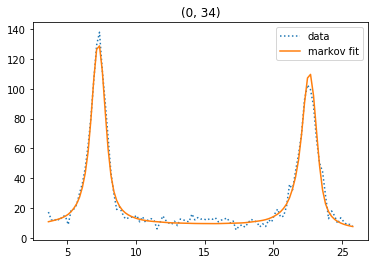

(0, 33)
                Co     Omega     Gamma  delta_position   delta_width  \
Values    0.012459  7.343510  0.151767       -2.000000     51.304650   
StdErrs   0.043863  0.022366  0.015659     3396.693990  26160.780664   
Initials  0.012928  7.333312  0.145366       -1.999994     47.906976   

          delta_amplitude             A         mu       sigma     shift  \
Values           0.009889  5.157165e+03  12.012185   16.807576  0.038718   
StdErrs          4.050014  1.077059e+10  34.010653  100.595355  0.021612   
Initials         0.013641  4.343096e+03  11.961076   16.790785  0.044882   

              offset  
Values     -0.324760  
StdErrs   199.670060  
Initials   -0.242811  


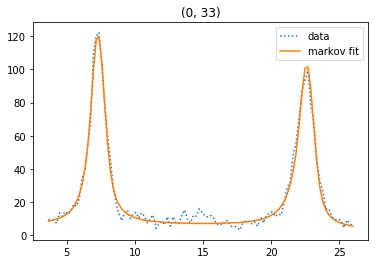

(0, 32)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.012621  7.337486  0.139781       -1.999371    41.981854   
StdErrs   0.047111  0.020937  0.015097      418.792577  4826.400423   
Initials  0.012459  7.343510  0.151767       -2.000000    51.304650   

          delta_amplitude             A         mu       sigma     shift  \
Values           0.009663  4.189278e+03  12.132307   16.824383  0.042181   
StdErrs          0.904197  8.567658e+09  34.459236  106.513721  0.020895   
Initials         0.009889  5.157165e+03  12.012185   16.807576  0.038718   

             offset  
Values    -0.441738  
StdErrs   71.101704  
Initials  -0.324760  


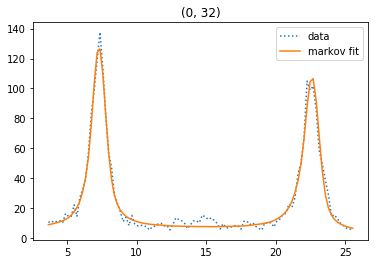

(0, 31)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.012331  7.304017  0.133275       -2.000000    35.412097   
StdErrs   0.046443  0.020452  0.015019      246.901435  2470.173604   
Initials  0.012621  7.337486  0.139781       -1.999371    41.981854   

          delta_amplitude             A         mu       sigma     shift  \
Values           0.004689  4.643358e+03  12.253630   16.841208  0.069619   
StdErrs          0.250403  9.870479e+09  32.959493  108.014863  0.020331   
Initials         0.009663  4.189278e+03  12.132307   16.824383  0.042181   

             offset  
Values     1.785878  
StdErrs   25.015202  
Initials  -0.441738  


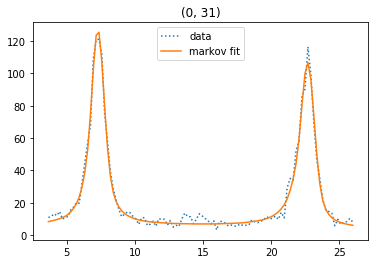

(0, 30)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.013656  7.303625  0.161306       -2.000000    33.986902   
StdErrs   0.038744  0.023929  0.017545      131.834011  1112.251411   
Initials  0.012331  7.304017  0.133275       -2.000000    35.412097   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.009456  4.023679e+03  12.376167  16.858049  0.097477   
StdErrs          0.272525  7.256188e+09  23.356223  81.422187  0.021899   
Initials         0.004689  4.643358e+03  12.253630  16.841208  0.069619   

             offset  
Values     2.000000  
StdErrs   39.217800  
Initials   1.785878  


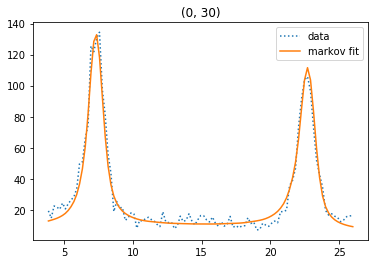

(0, 29)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.012802  7.336454  0.116849       -2.000000    33.486806   
StdErrs   0.053025  0.023525  0.014342      349.514247  1928.537221   
Initials  0.013656  7.303625  0.161306       -2.000000    33.986902   

          delta_amplitude             A         mu       sigma     shift  \
Values           0.005394  3.219303e+03  12.499928   16.874907  0.102777   
StdErrs          0.248369  7.304423e+09  32.316347  119.152774  0.019004   
Initials         0.009456  4.023679e+03  12.376167   16.858049  0.097477   

             offset  
Values     2.000000  
StdErrs   23.587088  
Initials   2.000000  


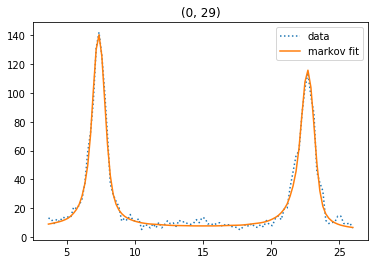

(0, 28)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.012847  7.343432  0.135919       -2.000000    38.934580   
StdErrs   0.048501  0.021094  0.014688      302.827462  2772.777010   
Initials  0.012802  7.336454  0.116849       -2.000000    33.486806   

          delta_amplitude             A         mu       sigma     shift  \
Values           0.010973  3.863081e+03  12.374929   16.858032  0.110300   
StdErrs          0.677939  7.930591e+09  30.883693  108.277269  0.021651   
Initials         0.005394  3.219303e+03  12.499928   16.874907  0.102777   

             offset  
Values    -0.658604  
StdErrs   64.243764  
Initials   2.000000  


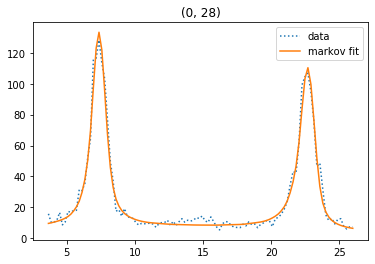

(0, 27)
                Co     Omega     Gamma  delta_position  delta_width  \
Values    0.013403  7.298113  0.141924       -2.000000    31.648388   
StdErrs   0.040946  0.020574  0.016015      102.271992   664.991680   
Initials  0.012847  7.343432  0.135919       -2.000000    38.934580   

          delta_amplitude             A         mu      sigma     shift  \
Values           0.014400  4.628319e+03  12.251180  16.841174  0.079223   
StdErrs          0.339744  8.336498e+09  26.543463  87.471229  0.020758   
Initials         0.010973  3.863081e+03  12.374929  16.858032  0.110300   

             offset  
Values    -2.000000  
StdErrs   50.219633  
Initials  -0.658604  


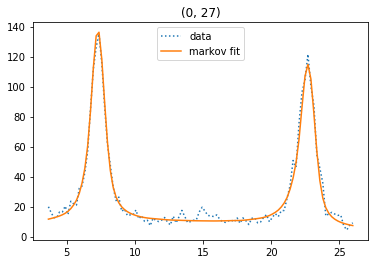

(0, 26)
                Co     Omega     Gamma  delta_position   delta_width  \
Values    0.012358  7.343782  0.126560    2.000000e+00  1.408718e+04   
StdErrs   0.023183  0.020435  0.013640    3.508954e+06  4.159502e+09   
Initials  0.013403  7.298113  0.141924   -2.000000e+00  3.164839e+01   

          delta_amplitude             A         mu      sigma     shift  \
Values           3.008065  5.328569e+03  12.244750  16.824333  0.113537   
StdErrs     888222.163839  9.693849e+09  15.903157  53.746445  0.020324   
Initials         0.014400  4.628319e+03  12.251180  16.841174  0.079223   

             offset  
Values    -2.000000  
StdErrs   53.944912  
Initials  -2.000000  


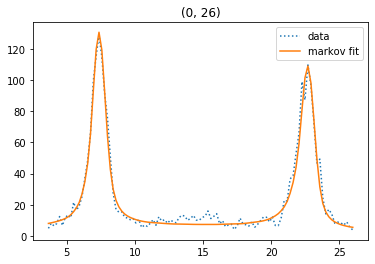

(0, 25)
                Co     Omega     Gamma  delta_position    delta_width  \
Values    0.013258  7.333299  0.129274       -2.000000     221.228978   
StdErrs   0.057331  0.021732  0.014707    38601.650357  306361.617818   
Initials  0.012358  7.343782  0.126560        2.000000   14087.177617   

          delta_amplitude             A         mu       sigma     shift  \
Values           0.039535  6.375362e+03  12.122303   16.841157  0.102716   
StdErrs         53.746703  1.422288e+10  39.258165  123.808167  0.019922   
Initials         3.008065  5.328569e+03  12.244750   16.824333  0.113537   

            offset  
Values     2.00000  
StdErrs   94.86828  
Initials  -2.00000  


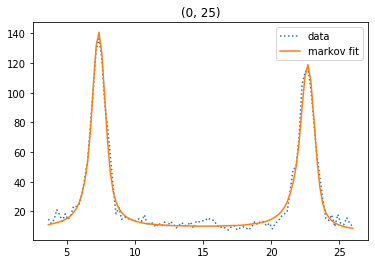

In [39]:
Plot_Elements_Spectrum(matrix, boni[:10], fit = 'markov')

In [40]:
for ii,jj in boni[:5]:
    print(matrix[ii][jj].Markov_Fit_Params.values[0])

[ 1.29275944e-02  7.33331162e+00  1.45366258e-01 -1.99999416e+00
  4.79069757e+01  1.36408595e-02  4.34309617e+03  1.19610760e+01
  1.67907848e+01  4.48820049e-02 -2.42810651e-01]
[ 1.24589736e-02  7.34351011e+00  1.51767258e-01 -2.00000000e+00
  5.13046496e+01  9.88887368e-03  5.15716546e+03  1.20121855e+01
  1.68075756e+01  3.87175880e-02 -3.24760126e-01]
[ 1.26205884e-02  7.33748631e+00  1.39780730e-01 -1.99937051e+00
  4.19818545e+01  9.66259229e-03  4.18927831e+03  1.21323073e+01
  1.68243832e+01  4.21807042e-02 -4.41738259e-01]
[ 1.23313064e-02  7.30401679e+00  1.33274589e-01 -2.00000000e+00
  3.54120969e+01  4.68946012e-03  4.64335770e+03  1.22536304e+01
  1.68412075e+01  6.96185439e-02  1.78587840e+00]
[ 1.36556030e-02  7.30362513e+00  1.61305804e-01 -2.00000000e+00
  3.39869023e+01  9.45602011e-03  4.02367915e+03  1.23761667e+01
  1.68580488e+01  9.74770347e-02  1.99999989e+00]


In [41]:
################ TOTALE

with open(now_path+'y_tot_fit.txt', 'r') as fin:
    y_fits = fin.readlines()

with open(now_path+'cost_tot.txt', 'r') as fin:
    costi = fin.readlines()
with open(now_path+'tot_fit_params.txt', 'r') as fin:
    lines   =   fin.readlines()

if (len(boni) != len(lines)):
    raise ValueError("Incompatibilità tra lunghezza file parametri ({}) e informazioni fit ({})".format(len(boni), len(lines)))

for (line, y_fit, cost, (ii,jj)) in zip(lines, y_fits, costi,  boni) :
#for (line, cost, (ii,jj)) in zip(lines, costi,  boni) :
    matrix[ii][jj].Recover_Tot_Fit_Params(line)
    matrix[ii][jj].Recover_y_fit(np.array(y_fit[1:-2].split(), dtype = float))
    matrix[ii][jj].Recover_cost_tot(float(cost))

print('Ok ho recuperato le informazioni del Fit Totale')

Ok ho recuperato le informazioni del Fit Totale


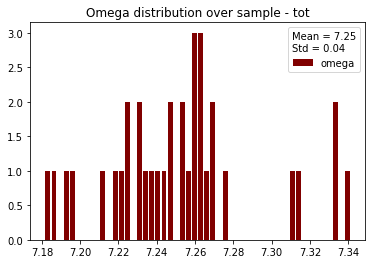

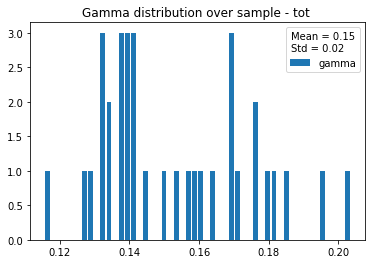

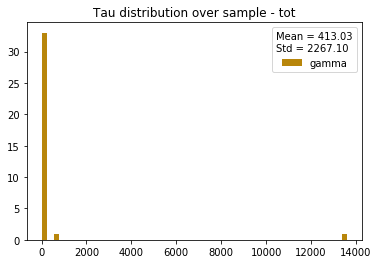

In [42]:
#HISTOGRAMs
tot_Omegas = np.array([matrix[ii][jj].Tot_Fit_Params['Omega'].values[0] for (ii,jj) in boni])
tot_Gammas =  np.array([matrix[ii][jj].Tot_Fit_Params['Gamma'].values[0] for (ii,jj) in boni])
taus       = np.array([matrix[ii][jj].Tot_Fit_Params['tau'].values[0] for (ii,jj) in boni])

plt.figure()
plt.title('Omega distribution over sample - tot')
_ = plt.hist(tot_Omegas, bins = 50, label = 'omega',histtype = 'bar', stacked = True, rwidth= 0.8,  color = 'maroon')
plt.legend(title='Mean = {:3.2f}\nStd = {:3.2f}'.format(np.mean(tot_Omegas), np.std(tot_Omegas)))
plt.savefig(now_path+'Omega_tot_distribution.pdf', format = 'pdf', bbox_inches='tight')
plt.show()
plt.close()
plt.figure()
plt.title('Gamma distribution over sample - tot ')
_ = plt.hist(tot_Gammas, bins = 50, label = 'gamma', histtype = 'bar', stacked = True, rwidth= 0.8)
plt.legend(title='Mean = {:3.2f}\nStd = {:3.2f}'.format(np.mean(tot_Gammas), np.std(tot_Gammas)))
plt.savefig(now_path+'Gamma_tot_distribution.pdf', format = 'pdf', bbox_inches='tight')
plt.show()
plt.close()
plt.figure()
plt.title('Tau distribution over sample - tot')
_ = plt.hist(taus, bins = 50, label = 'gamma', histtype = 'bar', stacked = True, rwidth= 0.8, color = 'darkgoldenrod')
plt.legend(title='Mean = {:3.2f}\nStd = {:3.2f}'.format(np.mean(taus), np.std(taus)))
plt.savefig(now_path+'tau_tot_distribution.pdf', format = 'pdf', bbox_inches='tight')
plt.show()
plt.close()


In [43]:
#Parametri di Interesse per analisi
tot_too_bad = ()
tot_too_good  = ()
tot_omega_too_high =  ()
tot_gamma_too_bad = ()
tau_not_bad = []

tot_omega_max = np.mean(tot_Omegas)+3*np.std(tot_Omegas)
tot_omega_min = np.mean(tot_Omegas)-3*np.std(tot_Omegas)

tot_gamma_max = np.mean(tot_Gammas)+5*np.std(tot_Gammas)
cost_max = 1000
cost_min = 50


tot_too_bad = Get_Bad_Elements(matrix, boni, cost_max, fit = 'tot')
tot_too_good = Get_Good_Elements(matrix, boni, cost_min, fit = 'tot')
tot_omega_too_high = Whose_Param_Too_High('Omega', tot_omega_max, 'tot', matrix, boni)
tot_gamma_too_high = Whose_Param_Too_High('Gamma', tot_gamma_max, 'tot', matrix, boni)
tot_omega_too_low =  Whose_Param_Too_Low('Omega', tot_omega_min,'tot', matrix, boni)

#aggiunte 
omega_different_from_mark = []
gamma_different_from_mark = []

percentage_diff = 0.8
tot_too_offset = ()
percentage_gamma = 100
max_offset = 30
almost_height = ()

for (ii,jj) in boni:
    
    perc_omega = matrix[ii][jj].Tot_Fit_Params['Omega'].values[0]*percentage_diff/100
    perc_gamma = matrix[ii][jj].Tot_Fit_Params['Omega'].values[0]*percentage_diff/100

    if (matrix[ii][jj].Tot_Fit_Params['Omega'].values[0] > matrix[ii][jj].Markov_Fit_Params['Omega'].values[0] + perc_gamma) | (matrix[ii][jj].Tot_Fit_Params['Omega'].values[0] < matrix[ii][jj].Markov_Fit_Params['Omega'].values[0] - perc_gamma):
        omega_different_from_mark.append((ii,jj))
    if (matrix[ii][jj].Tot_Fit_Params['Gamma'].values[0] > matrix[ii][jj].Markov_Fit_Params['Gamma'].values[0] + perc_gamma) | (matrix[ii][jj].Tot_Fit_Params['Gamma'].values[0] < matrix[ii][jj].Markov_Fit_Params['Gamma'].values[0] - perc_omega):
        gamma_different_from_mark.append((ii,jj))
    if matrix[ii][jj].Tot_Fit_Params.T.StdErrs['Gamma'] > (matrix[ii][jj].Tot_Fit_Params.T.Values['Gamma']*(percentage_gamma/100)):
        tot_gamma_too_bad += ((ii,jj),)
    if matrix[ii][jj].Tot_Fit_Params['offset'].values[0] > max_offset:
        tot_too_offset += ((ii,jj),)
    if matrix[ii][jj].y.max() > 15000:
        tot_almost_height += ((ii,jj),)
    if matrix[ii][jj].Tot_Fit_Params['tau']['StdErrs'] < matrix[ii][jj].Tot_Fit_Params['tau']['Values']:
        tau_not_bad.append((ii,jj))


print('\n\n\n\nHo trovato per i dati fit markov in {} :\n'.format(now_path))

print('{} elementi con chi quadro > {} '.format(len(tot_too_bad), cost_max))
print('{} elementi con chi quadro < {} \n'.format(len(tot_too_good), cost_min))


print('{} elementi con Omega > Omega max {:3.2f}'.format(len(tot_omega_too_high), tot_omega_max))
print('{} elementi con Omega < Omega min {:3.2f}'.format(len(tot_omega_too_low), tot_omega_min))

print('{} elementi con Gamma > Gamma max {:3.2f}\n'.format(len(tot_gamma_too_high), tot_gamma_max))


print('{} elementi con Gamma con errore percentuale > {} \n'.format(len(tot_gamma_too_bad), percentage_gamma))
print('{} elementi con offset > {} \n'.format(len(tot_too_offset), max_offset))

print('{} elementi il cui fit tot di Omega è diverso del {} percento da markoviano'.format(len(omega_different_from_mark), percentage_diff))
print('{} elementi il cui fit tot di Gamma è diverso del {} percento da markoviano'.format(len(gamma_different_from_mark), percentage_diff))
print('{} elementi il cui fit di tau non è cosi male..'.format(len(tau_not_bad)), tau_not_bad)


I found 0 bad elements out of 35

I found 23 good elements out of 35





Ho trovato per i dati fit markov in ../BRILLOUIN/TDP43/NO_ARS_13_02/dabuttare/ :

0 elementi con chi quadro > 1000 
23 elementi con chi quadro < 50 

0 elementi con Omega > Omega max 7.37
0 elementi con Omega < Omega min 7.13
0 elementi con Gamma > Gamma max 0.26

9 elementi con Gamma con errore percentuale > 100 

0 elementi con offset > 30 

29 elementi il cui fit tot di Omega è diverso del 0.8 percento da markoviano
0 elementi il cui fit tot di Gamma è diverso del 0.8 percento da markoviano
0 elementi il cui fit di tau non è cosi male.. []


In [44]:
Plot_Elements_Spectrum(matrix, tau_not_bad[:10], fit = 'tot')

Completata Parameter_Map per Omega
Ho trovato 0 elementi saturati


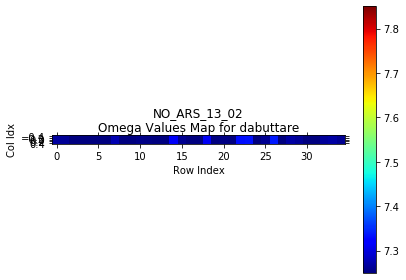

Completata Parameter_Map per Omega
Ho trovato 0 elementi saturati


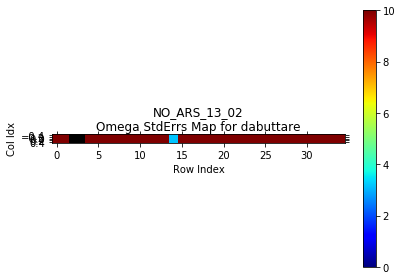

Completata Parameter_Map per Gamma
Ho trovato 0 elementi saturati


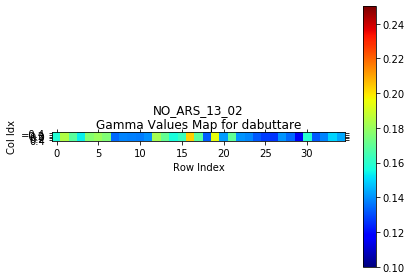

Completata Parameter_Map per Gamma
Ho trovato 0 elementi saturati


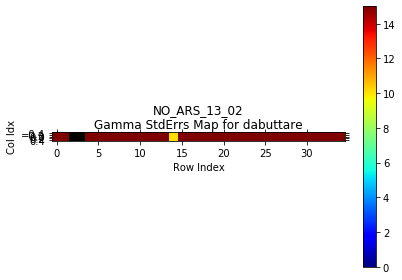

Completata Parameter_Map per tau
Ho trovato 0 elementi saturati


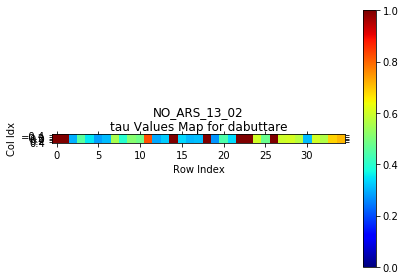

Completata Parameter_Map per tau
Ho trovato 0 elementi saturati


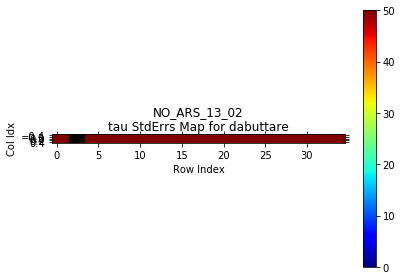

In [45]:
omega_tot_map, _ = Get_Parameter_Map('tot', 'Omega', matrix, n_rows, n_cols, excluded, 'jet', 7.25, 7.85, analysis_dir, spectra_filename,fig = 'omega_tot_map', path=now_path)
Delta_omega_tot_map, _ = Get_Parameter_Map('tot', 'Omega', matrix, n_rows, n_cols, excluded, 'jet', 0,10,analysis_dir, spectra_filename, fig = 'Delta_omega_tot_map', path=now_path, Deltas = True)
gamma_tot_map, _ = Get_Parameter_Map('tot', 'Gamma', matrix, n_rows, n_cols, excluded, 'jet', 0.1,0.25, analysis_dir, spectra_filename,fig = 'Gamma_tot_map', path=now_path)
Delta_gamma_tot_map, _ = Get_Parameter_Map('tot', 'Gamma', matrix, n_rows, n_cols, excluded, 'jet', 0,15,analysis_dir, spectra_filename, fig = 'Delta_gamma_tot_map', path=now_path, Deltas = True)
tau_map, _ = Get_Parameter_Map('tot', 'tau', matrix, n_rows, n_cols, excluded, 'jet', 0., 1,analysis_dir, spectra_filename, fig = 'tau_map', path=now_path)
Delta_tau_map, _ = Get_Parameter_Map('tot', 'tau', matrix, n_rows, n_cols, excluded, 'jet', 0,50,analysis_dir, spectra_filename, fig = 'Delta_tau_map', path=now_path, Deltas = True)

Completata Parameter_Map per tau
Ho trovato 38 elementi saturati


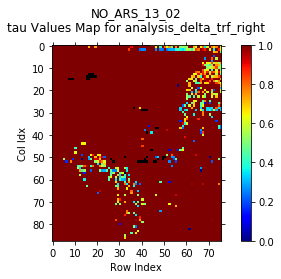

In [21]:
tau_map, _ = Get_Parameter_Map('tot', 'tau', matrix, n_rows, n_cols, excluded, 'jet', 0., 1,analysis_dir, spectra_filename, fig = 'tau_map', path=now_path)


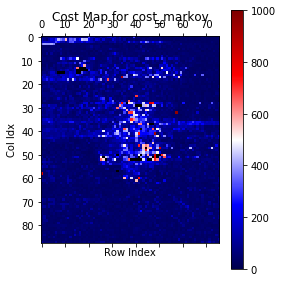

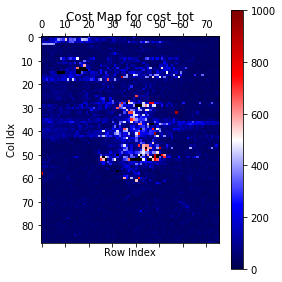

In [22]:
markov_cost_map = Get_cost_map(matrix, 'markov', len(rows), len(cols), 'markov_cost_map', path = now_path)
tot_cost_map = Get_cost_map(matrix, 'tot', len(rows), len(cols), 'tot_cost_map', path = now_path)


In [23]:
for ii,jj in boni[:2]:
    matrix[ii][jj].Markov_Fit_Params.to_hdf('markov_prova.df', key = str((ii,jj)))

In [24]:
prova = []
for ii,jj in boni[:2]:
    prova.append(pd.read_hdf('markov_prova.df', str((ii,jj))))

In [25]:
prova

[                Co     Omega     Gamma  delta_position  delta_width  \
 Values    0.014027  7.309591  0.143674        2.000000    13.860042   
 StdErrs   0.049703  0.019745  0.013825       33.683422    64.385230   
 Initials  0.011746  7.384492  0.121012       -1.255475     9.153369   
 
           delta_amplitude             A         mu       sigma     shift  \
 Values           0.002777  2.917428e+03  11.961076   16.790785  0.059544   
 StdErrs          0.052409  5.382718e+09  34.537195  100.937285  0.019969   
 Initials         0.009168  3.637026e+03  11.842650   16.774011  0.206052   
 
              offset  
 Values     1.425335  
 StdErrs   29.466100  
 Initials   2.000000  ,
                 Co     Omega     Gamma  delta_position  delta_width  \
 Values    0.013529  7.322057  0.146387       -1.999978    44.083602   
 StdErrs   0.045194  0.020639  0.014216      520.988786  5661.570599   
 Initials  0.014027  7.309591  0.143674        2.000000    13.860042   
 
           delta_

In [69]:
p0s = {}
for ii,jj in boni[:5]:
    p0s[str((ii,jj))] = matrix[ii][jj].Markov_Fit_Params.T['Values'][list(cols_mark)]

In [73]:
neighs = [(0,32), (0,30)]
np.min([matrix[ii][jj].Get_cost_markov(p0s[str((ii,jj))].values, cols_mark) for ii,jj in neighs])

AttributeError: 'Spectrum' object has no attribute 'VIPA_w_j'

In [105]:
costs = []
for p in p0s.items():
    print(p[1])

Co                    0.012928
Omega                 7.333312
Gamma                 0.145366
delta_position       -1.999994
delta_width          47.906976
delta_amplitude       0.013641
A                  4343.096175
mu                  123.000000
sigma               123.000000
shift                 0.044882
offset               -0.242811
Name: Values, dtype: float64
Co                    0.012459
Omega                 7.343510
Gamma                 0.151767
delta_position       -2.000000
delta_width          51.304650
delta_amplitude       0.009889
A                  5157.165463
mu                  123.000000
sigma               123.000000
shift                 0.038718
offset               -0.324760
Name: Values, dtype: float64
Co                    0.012621
Omega                 7.337486
Gamma                 0.139781
delta_position       -1.999371
delta_width          41.981854
delta_amplitude       0.009663
A                  4189.278315
mu                  123.000000
sigma       

In [103]:
for p in p0s.items():
    p[1][['mu', 'sigma']]  = np.array([123. , 123])
    print(p[1])

Co                    0.012928
Omega                 7.333312
Gamma                 0.145366
delta_position       -1.999994
delta_width          47.906976
delta_amplitude       0.013641
A                  4343.096175
mu                  123.000000
sigma               123.000000
shift                 0.044882
offset               -0.242811
Name: Values, dtype: float64
Co                    0.012459
Omega                 7.343510
Gamma                 0.151767
delta_position       -2.000000
delta_width          51.304650
delta_amplitude       0.009889
A                  5157.165463
mu                  123.000000
sigma               123.000000
shift                 0.038718
offset               -0.324760
Name: Values, dtype: float64
Co                    0.012621
Omega                 7.337486
Gamma                 0.139781
delta_position       -1.999371
delta_width          41.981854
delta_amplitude       0.009663
A                  4189.278315
mu                  123.000000
sigma       

In [108]:
p[1]['Co']

0.013655603045332478